<a href="https://colab.research.google.com/github/pankaj18/hello_world/blob/master/Neural_style_transfer_pytorch_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
#!pip install torch torchvision

In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Task 2 : Loading VGG Pretrained Model

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [4]:
vgg=torchvision.models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


In [5]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [6]:
vgg=vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [7]:
for params in vgg.parameters():
  params.requires_grad_(False)

In [8]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
vgg=vgg.to(device)

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [10]:
from PIL import Image
def preprocess(image_path,max_size=500):
  image=Image.open(image_path).convert('RGB')
  if max(image.size)>500:
    size=max_size
  else:
    size=max(image.size)
  transforms=torchvision.transforms.Compose([
                                             torchvision.transforms.Resize(size),
                                             torchvision.transforms.ToTensor(),
                                             torchvision.transforms.Normalize(
                                                 mean=[0.485,0.456,0.406],
                                                 std=[0.229,0.224,0.225]
                                             )
                                             
  ])

  image=transforms(image)
  image=image.unsqueeze(0)
  return image




In [11]:
ls Project-NST/

69561.jpg      content11.jpg  representation.png  style10.jpg  style12.jpg
content10.jpg  README.md      spiderman.jpg       style11.jpg


In [12]:
content_preprocess=preprocess('./Project-NST/content11.jpg')
style_preprocess=preprocess('./Project-NST/style12.jpg')
content_preprocess=content_preprocess.to(device)
style_preprocess=style_preprocess.to(device)
print(content_preprocess.shape)
print(style_preprocess.shape)


torch.Size([1, 3, 259, 345])
torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def depreprocess(tensor):
  image=tensor.to('cpu').clone()
  image=image.numpy()
  image=image.squeeze(0)
  image=image.transpose(1,2,0) 
  image=image*np.array([0.229,0.224,0.225])+np.array([0.485,0.456,0.406])
  image=image.clip(0,1)
  return image

In [14]:
content_deprocess=depreprocess(content_preprocess)
style_depreprocess=depreprocess(style_preprocess)
print(content_deprocess.shape)
print(style_depreprocess.shape)

(259, 345, 3)
(625, 500, 3)


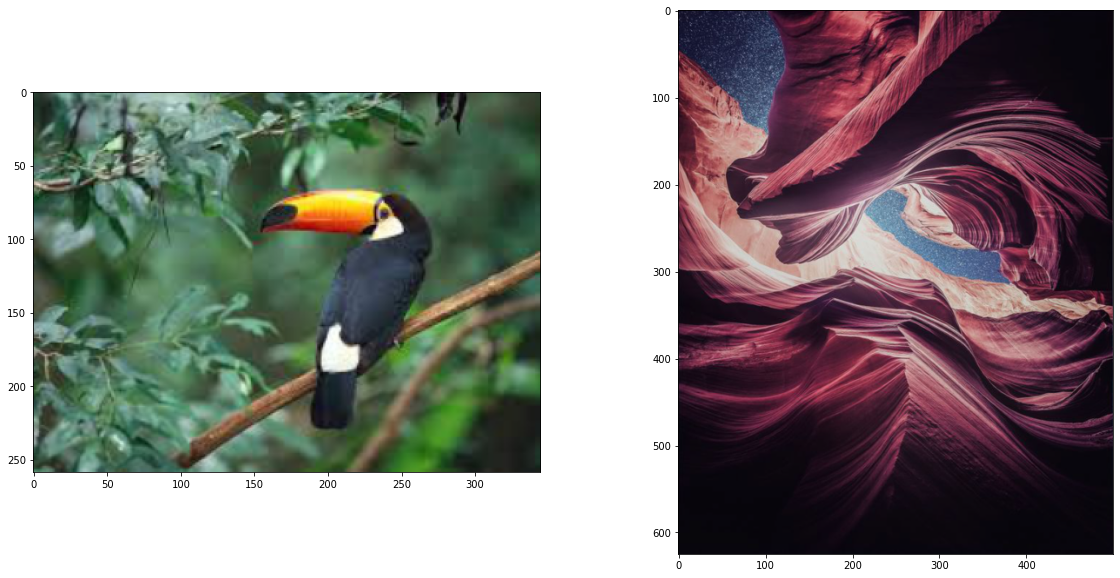

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
ax1.imshow(content_deprocess)
ax2.imshow(style_depreprocess)

## Task 5 : Get content,style features and create gram matrix

In [52]:
def get_features(image,model):
  layers={
      "0":"conv1_1",
      "5":"conv2_1",
      "10":"conv3_1",
      "19":"conv4_1",
      "21":"conv4_2", # content features
      "28": "conv5_1"
  }
  x=image
  Features={}
  for name,layer in model._modules.items():
    x=layer(x)
    if name in layers:
      Features[layers[name]]=x

  return Features
  


In [53]:
content_f=get_features(content_preprocess,vgg)
style_f=get_features(style_preprocess,vgg)

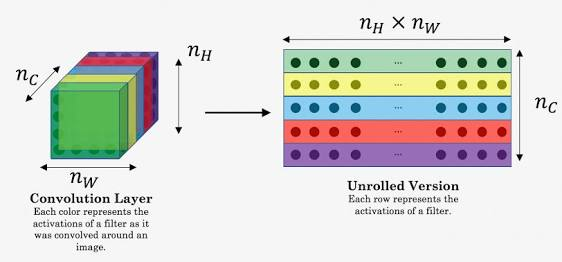

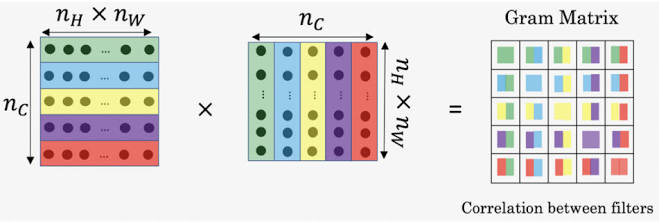

In [54]:
def gram_matrix(tensor):
  b,c,h,w=tensor.size()
  tensor=tensor.view(c,h*w)
  gram=torch.mm(tensor,tensor.t())
  return gram

In [55]:
style_grams={layer:gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [56]:
def content_loss(target_conv4_2,content_conv4_2):
  loss=torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [57]:
style_weights={
    'conv1_1':1.0,
    'conv2_1':0.75,
    'conv3_1':0.75,
    'conv4_1':0.2,
    'conv5_1':0.2
}

In [58]:
def style_loss(style_weights,target_features,style_grams):
  loss=0
  for layer in style_weights:
    target_f=target_features[layer]
    target_gram=gram_matrix(target_f)
    style_gram=style_grams[layer]
    b,c,h,w=target_f.shape
    layer_loss=style_weights[layer]*torch.mean((target_gram-style_gram)**2)
    loss+=layer_loss/(c*h*w)
  return loss

In [59]:
target=content_preprocess.clone().requires_grad_(True).to(device)
target_f=get_features(target,vgg)
print("content_loss:",content_loss(target_f['conv4_2'],content_f['conv4_2']))
print("style_loss:",style_loss(style_weights,target_f,style_grams))

content_loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style_loss: tensor(2411.5254, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [60]:
optimizer=torch.optim.Adam([target],lr=0.003)
alpha=1
beta=1e5
epochs=3000
show_every=500


In [61]:
def total_loss(c_loss,s_loss,alpha,beta):
  loss=alpha*c_loss+beta*s_loss
  return loss

In [62]:
results=[]
for i in range(epochs):
  target_f=get_features(target,vgg)
  c_loss=content_loss(target_f['conv4_2'],content_f['conv4_2'])
  s_loss=style_loss(style_weights,target_f,style_grams)
  t_loss=total_loss(c_loss,s_loss,alpha,beta)
  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()
  if i%show_every==0:
    print("total loss at epoch {}:{}".format(i,t_loss))
    results.append(depreprocess(target.detach()))

total loss at epoch 0:241152544.0
total loss at epoch 500:41455012.0
total loss at epoch 1000:19287350.0
total loss at epoch 1500:14452448.0
total loss at epoch 2000:11889027.0
total loss at epoch 2500:10130238.0


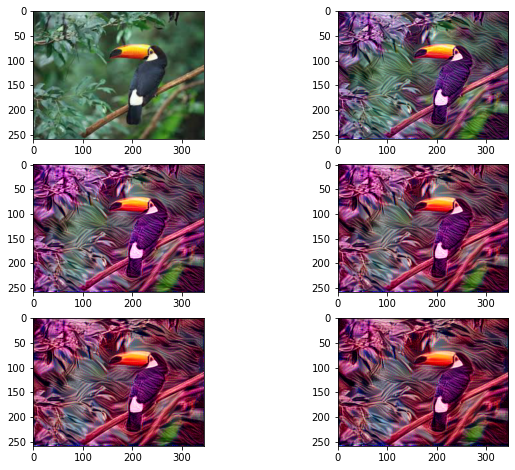

In [69]:
plt.figure(figsize=(10,8))
for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

In [68]:
results[1].shape

(259, 345, 3)

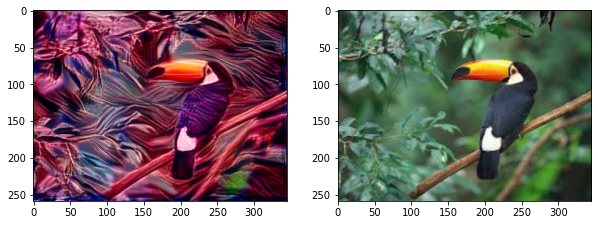

In [72]:
target_copy=depreprocess(target.detach())
content_copy=depreprocess(content_preprocess)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.imshow(target_copy)
ax2.imshow(content_copy)